In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import torch
import spacy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(f"File Import and setup done Successfully FILE PATH:{os.path.join(dirname, filename)}")
        

2025-10-24 04:59:27.444583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761281967.639781      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761281967.694331      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


File Import and setup done Successfully FILE PATH:/kaggle/input/ai-vs-human-text/AI_Human.csv


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the Data set

In [2]:
DataSet = pd.read_csv('/kaggle/input/ai-vs-human-text/AI_Human.csv')
DataSet.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# Getting the information from the DataSet 

In [3]:
DataSet.describe()

,generated
count,487235.000000
mean,0.372383
std,0.483440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
print(f"""
Columns(Names) in the DataSet {DataSet.columns}
Missing values in the DataSet {DataSet.isnull().sum()}
Unique values in the DataSet {DataSet.nunique()}
""")


Columns(Names) in the DataSet Index(['text', 'generated'], dtype='object')
Missing values in the DataSet text         0
generated    0
dtype: int64
Unique values in the DataSet text         487235
generated         2
dtype: int64



In [5]:
Human_Content = (DataSet['generated'] == 0).sum()
AI_Content = (DataSet['generated'] == 1).sum()

percentages = DataSet['generated'].value_counts(normalize=True) * 100
human_pct = percentages.get(0, 0)
ai_pct = percentages.get(1, 0)

print(f"Human generated content: {Human_Content} in percentage { human_pct:.2f}% of the DataSet is Human content")
print(f"AI generated content: {AI_Content} in percentage { ai_pct:.2f}% of the DataSet is Human content ")


Human generated content: 305797 in percentage 62.76% of the DataSet is Human content
AI generated content: 181438 in percentage 37.24% of the DataSet is Human content 


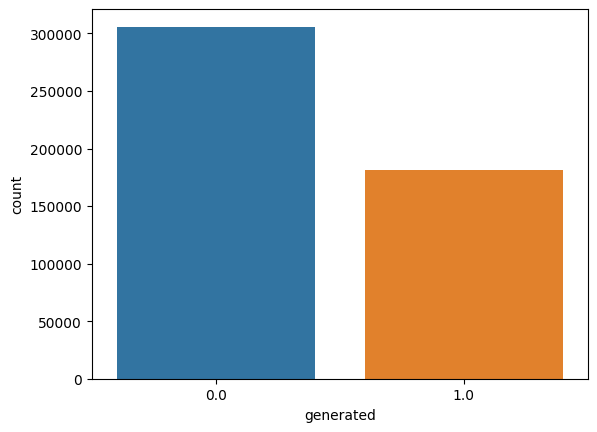

In [6]:
sns.countplot(data=DataSet,x='generated')
xlabel='generated'
ylabel='count'

# Pre-Processing the DataSet 

In [7]:
human = DataSet[DataSet['generated'] == 0]
ai = DataSet[DataSet['generated'] == 1]

In [8]:
print("Human Content Content:")
print(human.sample(n=1, random_state=42)['text'].values[0]) 
print("AI Content:")
print(ai.sample(n=1, random_state=42)['text'].values[0]) 


Human Content Content:
Do curfews keep teenagers from Getting into trouble? The city council is still currently debating on either adopting the curfew to be at 10 p. m. during the week days or at midnight on the weekends. If teenagers were to be out after the hours selected, it would be considered breaking the law. The laws are choose for many reasons, even if we don't tree with most of them; we have to obey the laws. I believe the city council should adopt the curfew for the minors. When it comes to under ate people in this world we have to be more concerned for their safety, it is best to have curfews. We should consider all the dangerous things Point on in this world.

Have you considered all the things that could happen when your child is out? There is many dangerous things Point on in this world. I'm not saying something will happen but honestly nowadays anything could happen. Without an adults care vision many things could occur. Many minors are band killed or harmed for reasons 

 Lowercasing the Text

In [9]:
def lowercase_text(text):
    return text.lower()
DataSet['processed_text'] = DataSet['text'].apply(lowercase_text)
print("Data succesfuly lowecased")

Data succesfuly lowecased


Punctuation Removal

In [10]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)       
    text = re.sub(r'\d+', '', text)           
    text = re.sub(r'[^\w\s]', '', text)       
    text = re.sub(r'\s+', ' ', text).strip()  
    return text
DataSet['processed_text'] = DataSet['text'].apply(clean_text)
print("Punctuation succesfully removed from the data")

Punctuation succesfully removed from the data


 Spell Check 
**Caution** it is slower(so I didn't did it)

In [11]:
# from spellchecker import SpellChecker
# spell = SpellChecker()

# def fast_spell_correct(text):
#     tokens = text.split()
#     corrected = []
#     for word in tokens:
#         corrected_word = spell.correction(word)
#         # If correction is None, keep original
#         if corrected_word is None:
#             corrected_word = word
#         corrected.append(corrected_word)
#     return ' '.join(corrected)

    
# DataSet['processed_text'] = DataSet['text'].apply(fast_spell_correct)
# print("Spell check succesfull")

Tokenization

In [12]:
def tokenize_text(text):
    return text.split()
DataSet['processed_text'] = DataSet['text'].apply(tokenize_text)
print("Tokenisation of the data was successful")

Tokenisation of the data was successful


Stopword removal

In [13]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

DataSet['processed_text'] = DataSet['text'].apply(remove_stopwords)
print("Stop word removal of the data was successful")

Stop word removal of the data was successful


In [14]:

def join_tokens(tokens):
    return ' '.join(tokens)

DataSet['processed_text'] = DataSet['text'].apply(join_tokens)

print(DataSet['processed_text'][0])


C a r s .   C a r s   h a v e   b e e n   a r o u n d   s i n c e   t h e y   b e c a m e   f a m o u s   i n   t h e   1 9 0 0 s ,   w h e n   H e n r y   F o r d   c r e a t e d   a n d   b u i l t   t h e   f i r s t   M o d e l T .   C a r s   h a v e   p l a y e d   a   m a j o r   r o l e   i n   o u r   e v e r y   d a y   l i v e s   s i n c e   t h e n .   B u t   n o w ,   p e o p l e   a r e   s t a r t i n g   t o   q u e s t i o n   i f   l i m i t i n g   c a r   u s a g e   w o u l d   b e   a   g o o d   t h i n g .   T o   m e ,   l i m i t i n g   t h e   u s e   o f   c a r s   m i g h t   b e   a   g o o d   t h i n g   t o   d o . 
 
 I n   l i k e   m a t t e r   o f   t h i s ,   a r t i c l e ,   " I n   G e r m a n   S u b u r b ,   L i f e   G o e s   O n   W i t h o u t   C a r s , "   b y   E l i z a b e t h   R o s e n t h a l   s t a t e s ,   h o w   a u t o m o b i l e s   a r e   t h e   l i n c h p i n   o f   s u b u r b s ,   w h e r e   m i d d l e 

In [15]:
# Export the dataset to CSV
DataSet.to_csv("processed_dataset.csv", index=False)

# Training the Model (First set)

In [16]:
ProcessedDataSet = pd.read_csv('/kaggle/working/processed_dataset.csv')
ProcessedDataSet.head()

,text,generated,processed_text
0,Cars. Cars have been around since they became ...,0.0,C a r s . C a r s h a v e b e e n a r ...
1,Transportation is a large necessity in most co...,0.0,T r a n s p o r t a t i o n i s a l a r ...
2,"""America's love affair with it's vehicles seem...",0.0,""" A m e r i c a ' s l o v e a f f a i r ..."
3,How often do you ride in a car? Do you drive a...,0.0,H o w o f t e n d o y o u r i d e i ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,C a r s a r e a w o n d e r f u l t h ...


In [17]:
Data = ProcessedDataSet.copy()
Data = Data.drop(columns=['text'])

In [18]:
human_proces= ProcessedDataSet[ProcessedDataSet['generated'] == 0]
ai_proces = ProcessedDataSet[ProcessedDataSet['generated'] == 1]

In [19]:
human_downsampled = human_proces.head(len(ai_proces))

balanced = pd.concat([human_downsampled, ai_proces]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced data shape:", balanced.shape)
print(balanced["generated"].value_counts())


Balanced data shape: (362876, 3)
generated
0.0    181438
1.0    181438
Name: count, dtype: int64


In [20]:
X = balanced["processed_text"]
y = balanced["generated"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

maxlen = 300
X_train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')

y_train = np.array(y_train)
y_test = np.array(y_test)

print("Tokenization complete.")
print("Training set shape:", X_train_padded.shape)
print("Test set shape:", X_test_padded.shape)


Tokenization complete.
Training set shape: (290300, 300)
Test set shape: (72576, 300)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam


In [23]:
vocab_size = 50000  # same as tokenizer
embedding_dim = 128
maxlen = 300

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary output
])

I0000 00:00:1761282603.767176      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [24]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=6,           
    batch_size=32,
    verbose=1
)


Epoch 1/6


I0000 00:00:1761282613.461758      58 cuda_dnn.cc:529] Loaded cuDNN version 90300


9072/9072 ━━━━━━━━━━━━━━━━━━━━ 370s 40ms/step - accuracy: 0.7193 - loss: 0.5318 - val_accuracy: 0.9336 - val_loss: 0.1745
Epoch 2/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 359s 40ms/step - accuracy: 0.9420 - loss: 0.1527 - val_accuracy: 0.9711 - val_loss: 0.0786
Epoch 3/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 358s 39ms/step - accuracy: 0.9733 - loss: 0.0739 - val_accuracy: 0.9820 - val_loss: 0.0502
Epoch 4/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 358s 39ms/step - accuracy: 0.9835 - loss: 0.0479 - val_accuracy: 0.9864 - val_loss: 0.0396
Epoch 5/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 358s 39ms/step - accuracy: 0.9878 - loss: 0.0354 - val_accuracy: 0.9876 - val_loss: 0.0363
Epoch 6/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 355s 39ms/step - accuracy: 0.9891 - loss: 0.0304 - val_accuracy: 0.9897 - val_loss: 0.0316


In [26]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

2268/2268 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9892 - loss: 0.0335

Test Accuracy: 98.97%


In [27]:
model.save("human-ai-classifier-1.keras")
# tokenizer.save_pretrained("distilbert-human-ai-classifier")
print("first Model Saved")

first Model Saved


# Training the Model(Second Set)

In [28]:
ProcessedDataSet = pd.read_csv('/kaggle/working/processed_dataset.csv')
ProcessedDataSet.head()

,text,generated,processed_text
0,Cars. Cars have been around since they became ...,0.0,C a r s . C a r s h a v e b e e n a r ...
1,Transportation is a large necessity in most co...,0.0,T r a n s p o r t a t i o n i s a l a r ...
2,"""America's love affair with it's vehicles seem...",0.0,""" A m e r i c a ' s l o v e a f f a i r ..."
3,How often do you ride in a car? Do you drive a...,0.0,H o w o f t e n d o y o u r i d e i ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,C a r s a r e a w o n d e r f u l t h ...


In [29]:
Data = ProcessedDataSet.copy()
Data = Data.drop(columns=['text'])

In [30]:
human_proces= ProcessedDataSet[ProcessedDataSet['generated'] == 0]
ai_proces = ProcessedDataSet[ProcessedDataSet['generated'] == 1]

In [31]:
human_downsampled = human_proces.tail(len(ai_proces))

balanced = pd.concat([human_downsampled, ai_proces]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced data shape:", balanced.shape)
print(balanced["generated"].value_counts())


Balanced data shape: (362876, 3)
generated
0.0    181438
1.0    181438
Name: count, dtype: int64


In [32]:
X = balanced["processed_text"]
y = balanced["generated"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

maxlen = 300
X_train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')

y_train = np.array(y_train)
y_test = np.array(y_test)

print("Tokenization complete.")
print("Training set shape:", X_train_padded.shape)
print("Test set shape:", X_test_padded.shape)


Tokenization complete.
Training set shape: (290300, 300)
Test set shape: (72576, 300)


In [34]:
vocab_size = 50000  # same as tokenizer
embedding_dim = 128
maxlen = 300

model = Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary output
])

In [35]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=6,           
    batch_size=32,
    verbose=1
)


Epoch 1/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 357s 39ms/step - accuracy: 0.6512 - loss: 0.6060 - val_accuracy: 0.8837 - val_loss: 0.2757
Epoch 2/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 353s 39ms/step - accuracy: 0.9145 - loss: 0.2176 - val_accuracy: 0.9671 - val_loss: 0.0892
Epoch 3/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 353s 39ms/step - accuracy: 0.9670 - loss: 0.0905 - val_accuracy: 0.9806 - val_loss: 0.0555
Epoch 4/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 353s 39ms/step - accuracy: 0.9822 - loss: 0.0522 - val_accuracy: 0.9831 - val_loss: 0.0480
Epoch 5/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 354s 39ms/step - accuracy: 0.9875 - loss: 0.0366 - val_accuracy: 0.9860 - val_loss: 0.0396
Epoch 6/6
9072/9072 ━━━━━━━━━━━━━━━━━━━━ 352s 39ms/step - accuracy: 0.9894 - loss: 0.0309 - val_accuracy: 0.9875 - val_loss: 0.0356


In [37]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

2268/2268 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.9866 - loss: 0.0382

Test Accuracy: 98.75%


In [38]:
model.save("human-ai-classifier-2.keras")
# tokenizer.save_pretrained("distilbert-human-ai-classifier")
print("Second Model Saved")

Second Model Saved
